In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from itertools import islice
import torch
import os
import wandb
from gluonts.dataset.repository import get_dataset, dataset_names
from gluonts.dataset.util import to_pandas
from gluonts.dataset.common import ListDataset
from tqdm.autonotebook import tqdm
from gluonts.evaluation import make_evaluation_predictions, Evaluator
from gluonts.dataset.pandas import PandasDataset
from lag_llama.gluon.estimator import LagLlamaEstimator

/home/eragroup/anaconda3/envs/lag_llama/lib/python3.12/site-packages/gluonts/json.py:101: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  warnings.warn(
/tmp/ipykernel_24214/1724617453.py:12: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
def generateSine(n_rows, n_cols, isAmpBig, isFreqVar):

    np.random.seed(42)
    x = np.linspace(0, 1, n_rows)

    data = {} # Create a dictionary to store all columns
    for i in range(n_cols):
        a = np.random.uniform(2, 8) if isAmpBig else np.random.uniform(0.5, 2) # Amplitude
        # b = np.random.uniform(-1, 1)  # Linear trend
        c = np.random.uniform(-1, 1) if isFreqVar else 1  # Whether frequency is set a variable 
        d = np.random.uniform(0, 2*np.pi)  # Phase shift
        e = np.random.uniform(-10, 10)  # First-order shift
        f = np.random.uniform(-10, 10)  # Vertical shift
        
        # y = a * (x + b) * np.sin(200*np.pi * c * x + d) + e * x + f # Generate the sine curve
        y = a * np.sin(200*np.pi * c * x + d) + e * x + f # Generate the sine curve
        
        data[f'curve_{i+1}'] = y 
    df = pd.DataFrame(data)  # Create DataFrame all at once
    df.index = pd.to_datetime(df.index, origin='2000-01-01', unit='s')
    return df

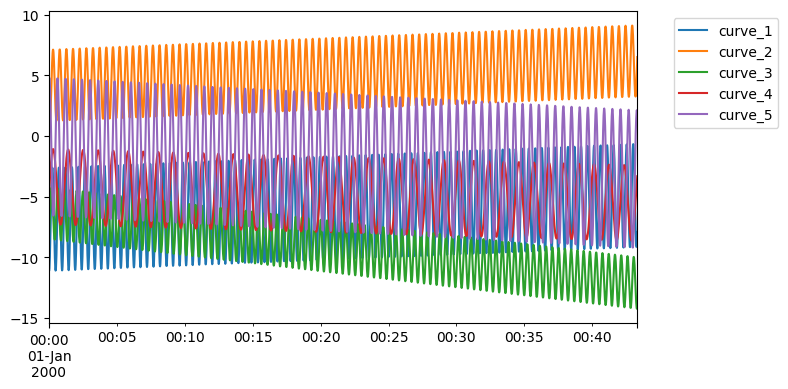

In [5]:
df1=generateSine(2600, 360, isAmpBig=True, isFreqVar=True)
df1.describe()
ax = df1[df1.columns[:5]].plot(figsize=(8, 4))
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()